In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

## A peek at the dataset 

In [155]:
#snippet of the data set

df = pd.read_csv('cosmetics.csv')
df.head(10)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [156]:
#shows basic stats of data set such as mean, median, std, 25%, 50%, 75%, max, & min of each row
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [158]:
print(df['Brand'].where(df['Rank'] < 4))
#printing the products that have more than 4 stars rating

0                                 NaN
1                                 NaN
2                                 NaN
3                              LA MER
4                                 NaN
                    ...              
1467                           KORRES
1468                  KATE SOMERVILLE
1469                    VITA LIBERATA
1470    ST. TROPEZ TANNING ESSENTIALS
1471                       DERMAFLASH
Name: Brand, Length: 1472, dtype: object


In [159]:
#showcasing the variety of brands
print(df.sort_values("Brand", axis=0, ascending=True,inplace=False, na_position='last'))

            Label                Brand  \
710     Treatment             ALGENIST   
662     Treatment             ALGENIST   
826     Treatment             ALGENIST   
1070    Face Mask             ALGENIST   
216   Moisturizer             ALGENIST   
...           ...                  ...   
1149    Eye cream  YOUTH TO THE PEOPLE   
51    Moisturizer  YOUTH TO THE PEOPLE   
115   Moisturizer  YOUTH TO THE PEOPLE   
326      Cleanser  YOUTH TO THE PEOPLE   
1284    Eye cream   YVES SAINT LAURENT   

                                                   Name  Price  Rank  \
710         GENIUS Ultimate Anti-Aging Vitamin C+ Serum    118   3.9   
662                      ELEVATE Advanced Retinol Serum     98   4.8   
826              ELEVATE Advanced Lift Contouring Cream     96   4.3   
1070  SPLASH Absolute Hydration Replenishing Sleepin...     48   3.6   
216   SUBLIME DEFENSE Ultra Lightweight UV Defense F...     28   4.4   
...                                                 ...    ... 

In [160]:
df.sort_values('Brand', ascending=True)
#sorted alphabetically in brand

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
710,Treatment,ALGENIST,GENIUS Ultimate Anti-Aging Vitamin C+ Serum,118,3.9,"Water, Glycerin, Butylene Glycol, 3-O-Ethyl As...",1,1,1,1,1
662,Treatment,ALGENIST,ELEVATE Advanced Retinol Serum,98,4.8,"Water, Dimethicone, Glycerin, Butylene Glycol,...",1,1,1,0,0
826,Treatment,ALGENIST,ELEVATE Advanced Lift Contouring Cream,96,4.3,"Water, Dimethicone, Dimethicone Crosspolymer, ...",1,1,1,1,1
1070,Face Mask,ALGENIST,SPLASH Absolute Hydration Replenishing Sleepin...,48,3.6,"Water, Butylene Glycol, Dimethicone, Glycerin,...",1,1,1,1,1
216,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1149,Eye cream,YOUTH TO THE PEOPLE,Superfood Peptide Eye Cream,35,4.0,"Water, Organic Glycerin, Organic Brassica Oler...",1,1,1,1,1
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
115,Moisturizer,YOUTH TO THE PEOPLE,Superfood Air-Whip Hyaluronic Acid Moisture Cream,48,4.2,"Water, Helianthus Annuus (Sunflower) Seed Oil,...",1,0,1,1,1
326,Cleanser,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",0,0,0,0,0


In [161]:
df.sort_values(by=['Brand', 'Price'], ascending=True)
#sorts 2 values in ascending progress

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
576,Cleanser,ALGENIST,Hydrating Essence Toner,25,4.4,"Water, Butylene Glycol, Sodium PCA, Hamamelis ...",0,0,0,0,0
216,Moisturizer,ALGENIST,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,28,4.4,"Cyclopentasiloxane, Water, Alcohol Denat., Gly...",0,0,0,0,0
514,Cleanser,ALGENIST,Multi-Perfecting Detoxifying Exfoliator,38,4.6,"Water, Caprylic/Capric Triglyceride, Hydroxyet...",0,0,0,0,0
547,Cleanser,ALGENIST,GENIUS Ultimate Anti-Aging Melting Cleanser,38,4.1,"C12-15 Alkyl Benzoate, Ethylhexyl Palmitate, C...",0,0,0,0,0
810,Treatment,ALGENIST,REVEAL Concentrated Color Correcting Drops,38,3.8,"Water, Dimethicone, Mica, Nylon-12, PEG-10 Dim...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
927,Face Mask,YOUTH TO THE PEOPLE,Superfood Skin Reset Antioxidant Mask,44,4.4,"Water, Kaolin, Organic Glycerin, Organic Brass...",1,1,1,1,1
115,Moisturizer,YOUTH TO THE PEOPLE,Superfood Air-Whip Hyaluronic Acid Moisture Cream,48,4.2,"Water, Helianthus Annuus (Sunflower) Seed Oil,...",1,0,1,1,1
51,Moisturizer,YOUTH TO THE PEOPLE,Adaptogen Deep Moisture Cream,58,4.8,"Purified Water, Helianthus Annuus (Sunflower) ...",1,1,1,1,1
692,Treatment,YOUTH TO THE PEOPLE,Superfood Firm and Brighten Vitamin C Serum,62,3.9,"Water, Lactic Acid, Citric Acid, Malic Acid, G...",1,1,1,1,1


## Cleaning the Dataset

* Omit the skin type & label columns 
* finding any null values & omitting them, and replace with `fillna()` (guarantees 77% accuracy)
* luckily, there are no null values which means the data analysis will be more accurate.
* remove duplicate values (none)
* standardize Capitalizations ()
* change the data type object & int to float to ge the most accurate results
* check how varied the data is (Z Score) & determine if the data set is a good representation 
* remove empty strings
* remove empty lists
* remove empty dictionaries

In [162]:
df = df.loc[:, ~df.columns.isin(['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label'])]

#print(df)
df.head(5)


,Brand,Name,Price,Rank,Ingredients
0,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


In [163]:
null_values = df.isnull()
print(null_values)

      Brand   Name  Price   Rank  Ingredients
0     False  False  False  False        False
1     False  False  False  False        False
2     False  False  False  False        False
3     False  False  False  False        False
4     False  False  False  False        False
...     ...    ...    ...    ...          ...
1467  False  False  False  False        False
1468  False  False  False  False        False
1469  False  False  False  False        False
1470  False  False  False  False        False
1471  False  False  False  False        False

[1472 rows x 5 columns]


In [164]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1467    False
1468    False
1469    False
1470    False
1471    False
Length: 1472, dtype: bool


In [171]:
#print(df['Brand'].astype(str).astype(int)) #Brand is obj
print(df['Price'].astype(float)) # price is a int
df['Price'] = df['Price'].astype(float)

0       175.0
1       179.0
2        68.0
3       175.0
4        38.0
        ...  
1467     35.0
1468     48.0
1469     54.0
1470     20.0
1471     45.0
Name: Price, Length: 1472, dtype: float64


### Calculating the Z score of the Price, Rank, and Brand Column to see the variedness of the dataset


-1.1681640834344094
6.984777286640398
-6.551731978296931
1.3357234260908981


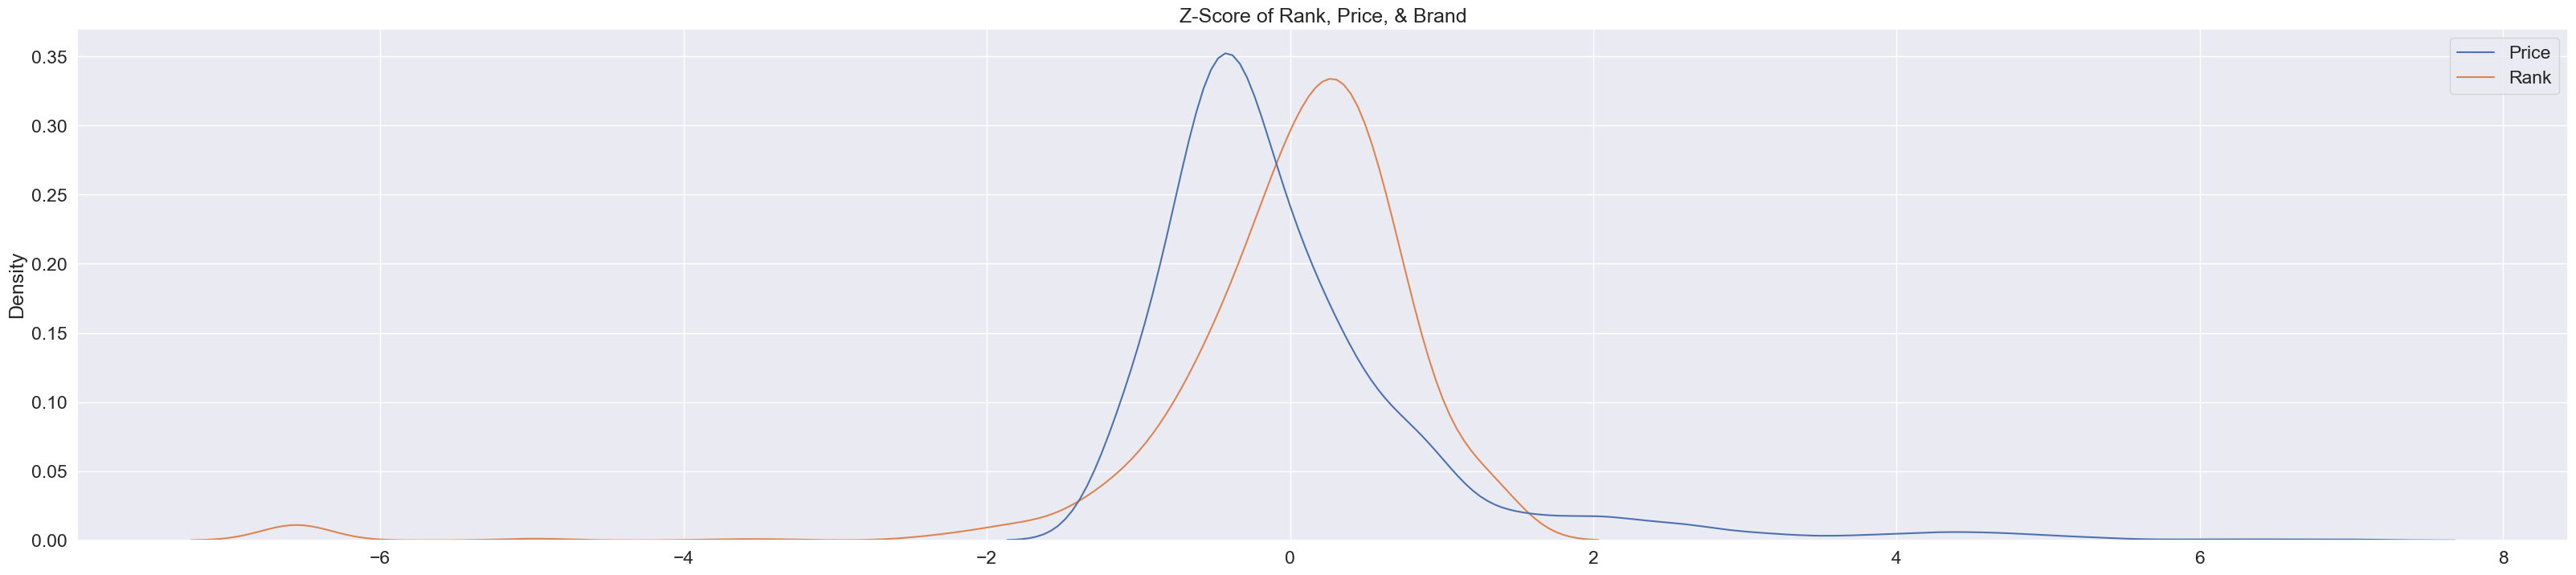

In [187]:
counts1 = df['Price'] =(df['Price'] - df['Price'].mean()) / df["Price"].std()

counts2 = df['Rank'] =(df['Rank'] - df['Rank'].mean()) / df["Rank"].std()

df['Price']
df['Rank']

df.max(axis=0)['Rank']


ax = sns.kdeplot(data=df)

ax.set_title("Z-Score of Rank, Price, & Brand")

price_min_z_score = df.min(axis=0)['Price']
price_max_z_score = df.max(axis=0)['Price']

rank_min_z_score = df.min(axis=0)['Rank']
rank_max_z_score = df.max(axis=0)['Rank']
print(price_min_z_score)
print(price_max_z_score)
print(rank_min_z_score)
print(rank_max_z_score)



fitting the data using logistic regression. this guarantees that there is a 79% accuracy with the newly filled in values.

```mermaid
graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;    
```

## Visualizing the top 10 brands

CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: Brand, dtype: int64


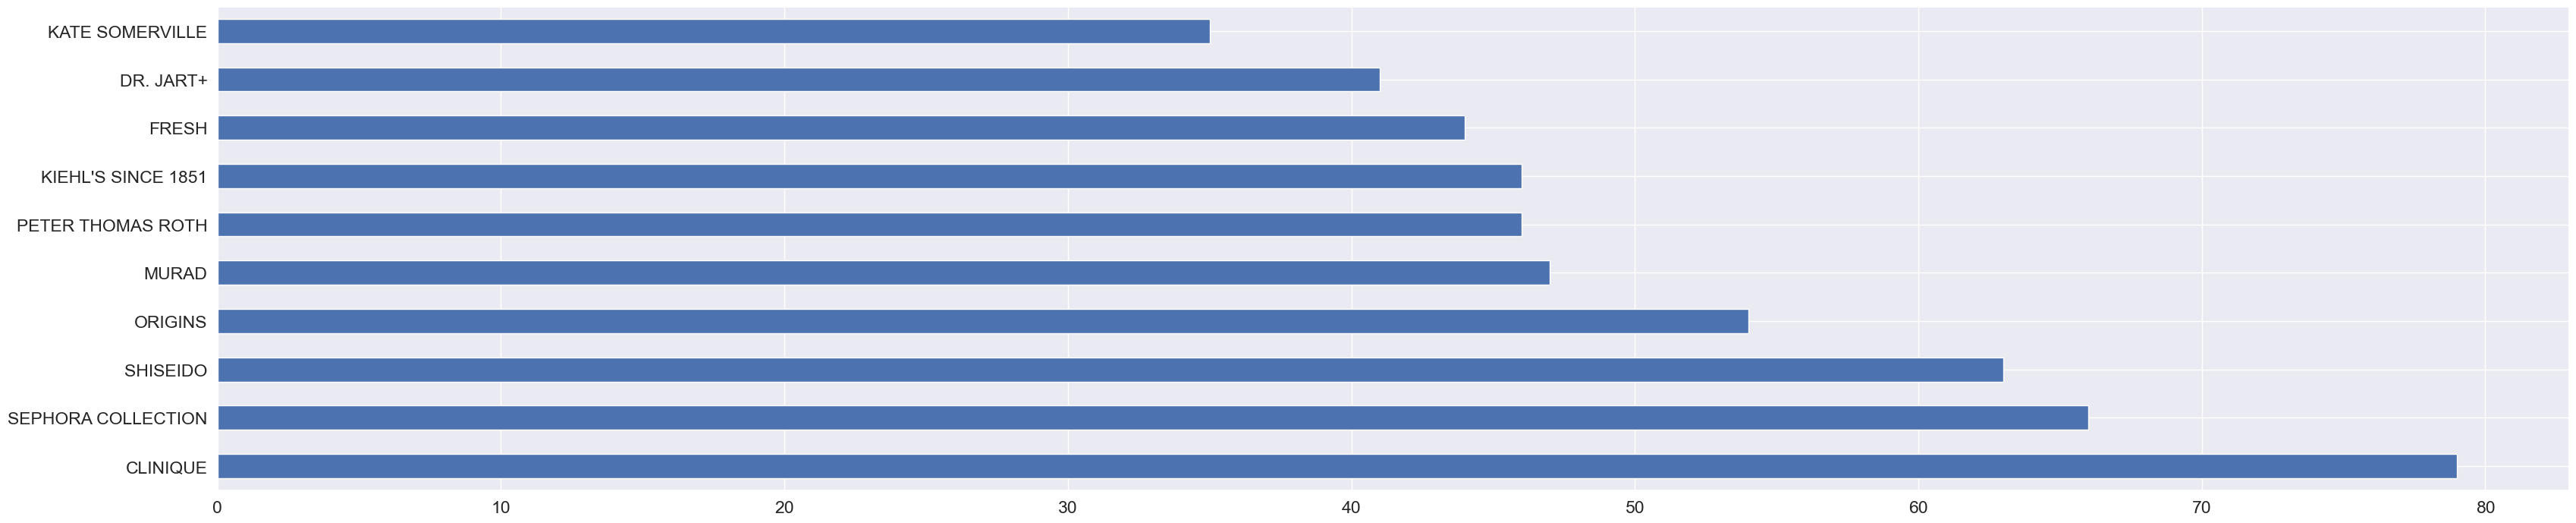

In [102]:
#counting the number of products a certain brand has in this data set
#only using pandas to visualize

df['Brand'].value_counts()

df['Brand'].value_counts()[:10].plot(kind='barh')
print(df['Brand'].value_counts()[:10])

<AxesSubplot:ylabel='Brand'>

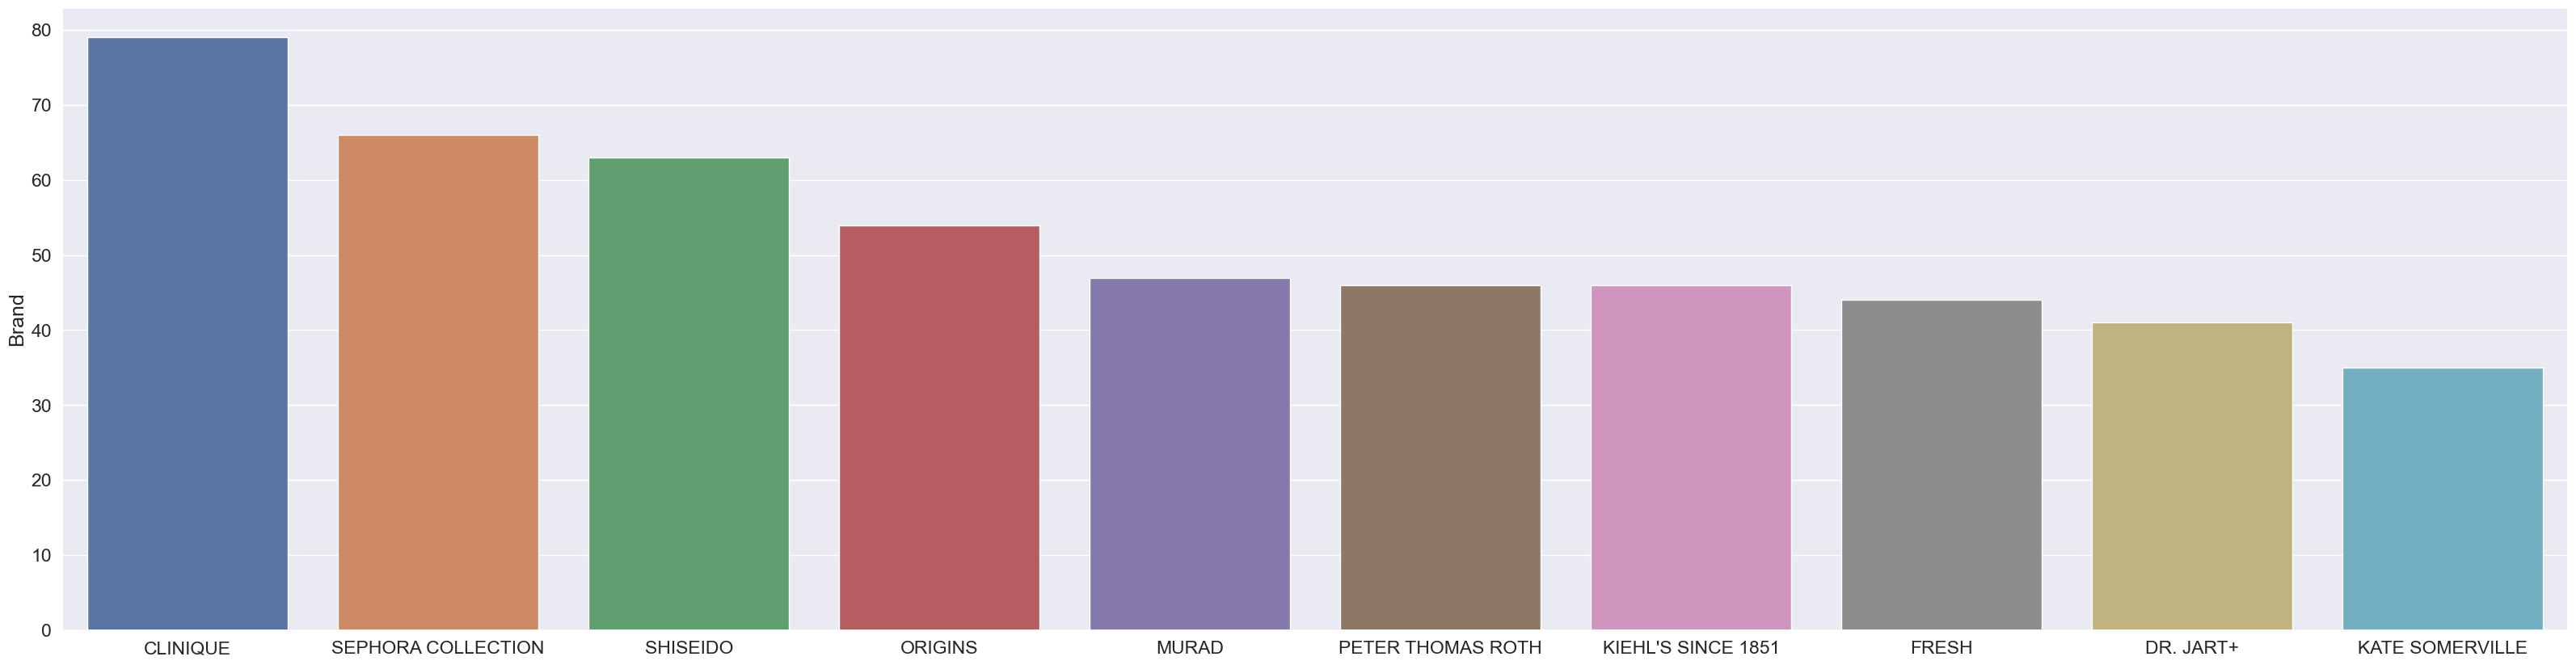

In [100]:
#advantges of graphing in seaborn: ability to manipulate chart style, colors, and sizes
#shows the top 10 brands that occur in this data set


df['Brand'].value_counts()

plt.figure(figsize=(40,10))
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
#sns.color_palette("crest", as_cmap=True)

sns.barplot(
    x=df['Brand'].value_counts()[:10].index, 
    y=df['Brand'].value_counts()[:10],
    data = df)



## Now we must search the ingredents column for common toxin names

### finding the variables occurances of each toxin in the ingredents column

131
499
1028
0
80
17
0
0
0
7
76
0


<AxesSubplot:>

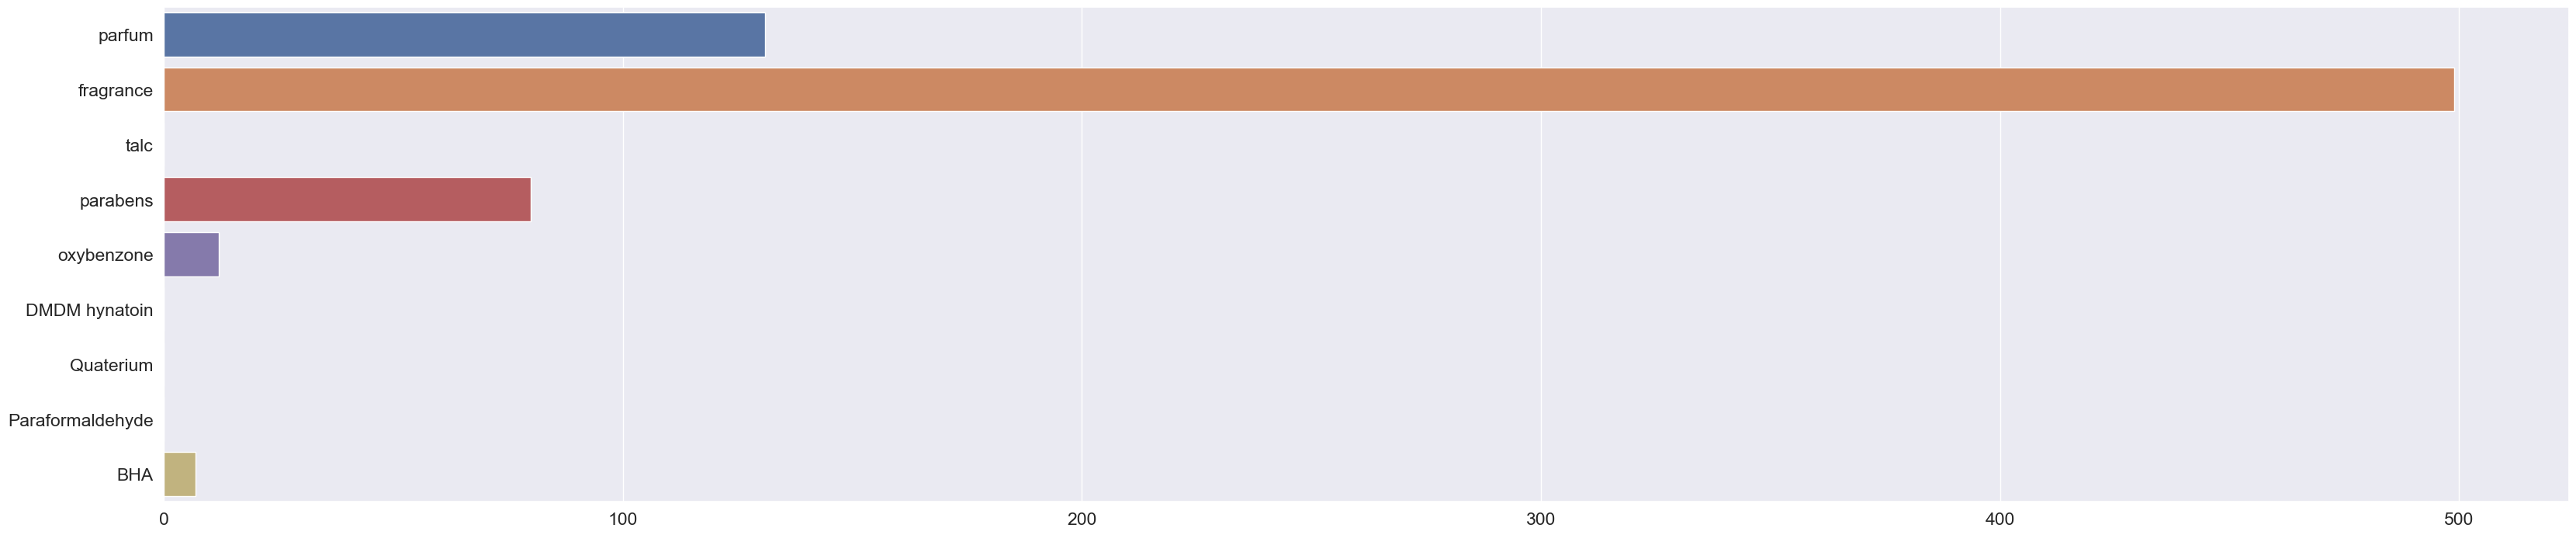

In [94]:


parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Glycol")].shape[0]


homosalate_occ = df[df['Ingredients'].str.contains("Homosalate")].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
DMDM_hyantoin_occ = df[df['Ingredients'].str.contains("DMDM hyantoin")].shape[0]
quaterium_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
paraformaldehyde_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
bha_occ = df[df['Ingredients'].str.contains("BHA")].shape[0]
bht_occ = df[df['Ingredients'].str.contains('BHT')].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains('diethanolamine')].shape[0]

talc_occ = df[df['Ingredients'].str.contains("talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("paraben")].shape[0]


print(parfum_occ)
print(fragrance_occ)
print(glycol_occ)
print(talc_occ)
print(parabens_occ)
print(homosalate_occ)
print(DMDM_hyantoin_occ)
print(quaterium_occ)
print(paraformaldehyde_occ)
print(bha_occ)
print(bht_occ)
print(diethanolamine_occ)

#for i in 

# make a new small df that has toxin name, toxin occurence. 
# plot that df 

x = [parfum_occ, fragrance_occ, talc_occ, parabens_occ, oxybenzone_occ, DMDM_hyantoin_occ, quaterium_occ, paraformaldehyde_occ, bha_occ ] 
y = ["parfum", "fragrance", "talc", "parabens", 'oxybenzone', 'DMDM hynatoin', 'Quaterium', 'Paraformaldehyde', 'BHA']
sns.barplot(x=x,y=y)



# plt.show()

#print(df[df['Ingredients'].str.contains("Parfum")].to_string())

# sns.barplot(
#     data = df,
#     x = df['Ingredients'].value_counts()[:5], 
#     y = df['Ingredients'].value_counts()[:5] 
# )

# #print(parfum_occ)
# print("\n")
# #print(fragrance_occ)

# #looking for "parfum" in the ingredents column

In [95]:
parfum = ['Parfum']

result_df = df[df['Ingredients'].isin(parfum)]

print('\nResult dataframe : \n',
      result_df)


Result dataframe : 
 Empty DataFrame
Columns: [Label, Brand, Name, Price, Rank, Ingredients, Combination, Dry, Normal, Oily, Sensitive]
Index: []


## Plotting the moderate-hazard chemcials

In [96]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

## Plotting the low hazard chemicals

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/972056039.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)


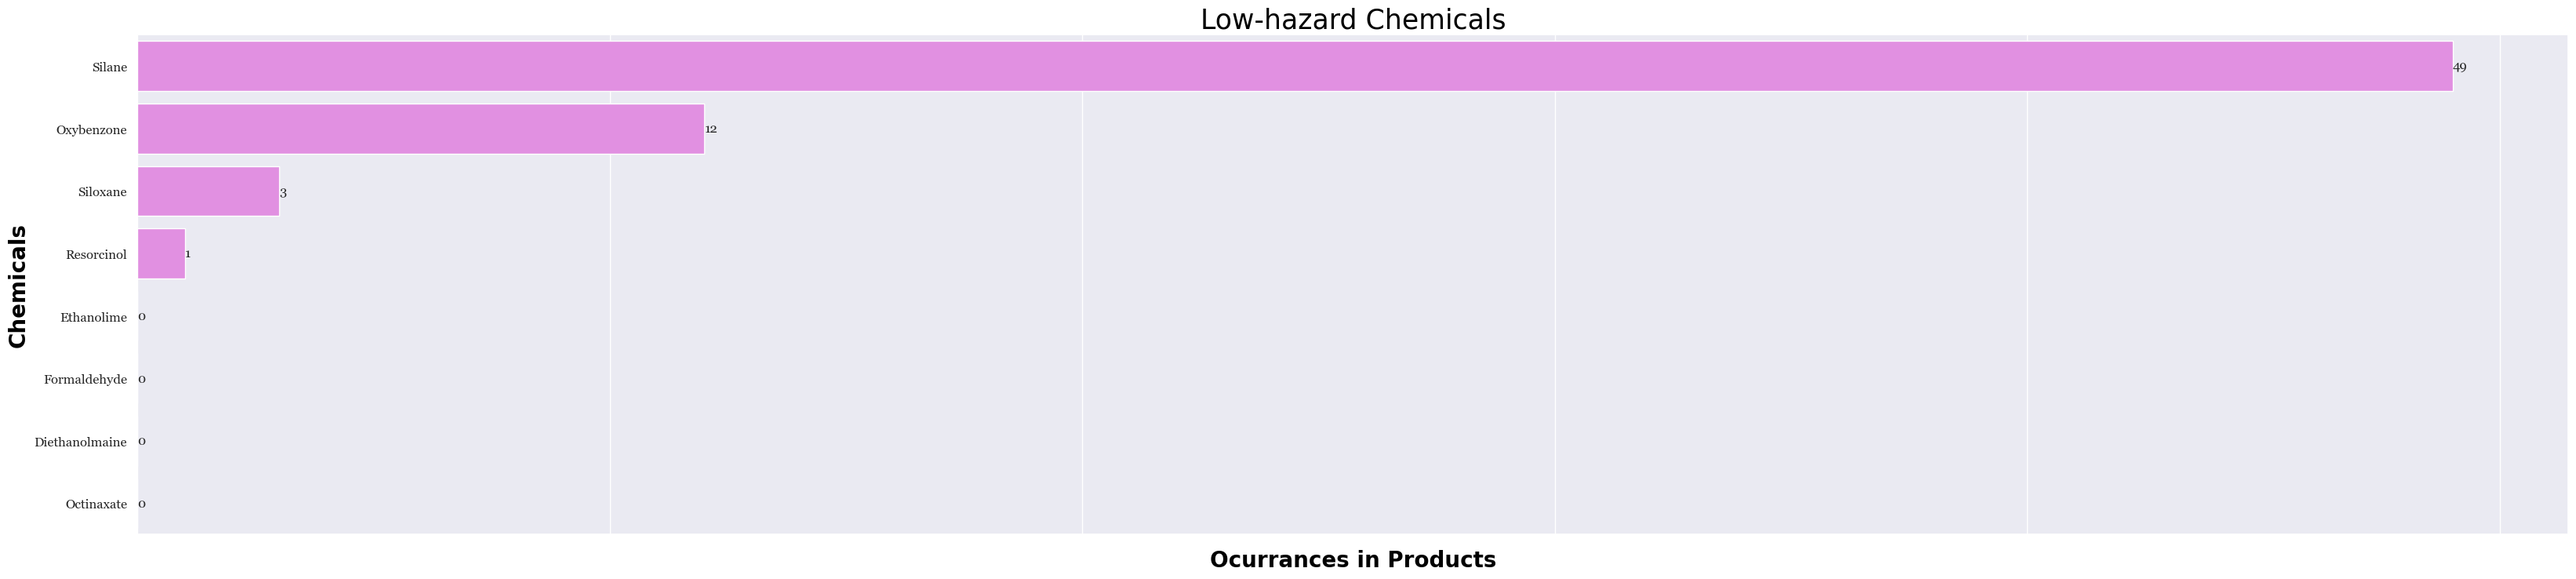

ValueError: Image size of 155510x830 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4000x1000 with 1 Axes>

In [97]:
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}
#plt_order = chemicals.groupby(['chemicals'])['occurances'].aggregate(np.median).reset_index().sort_values('occurances')

occurances = [silanes_occ, oxybenzone_occ, siloxanes_occ, resorcinol_occ, ethanolamine_occ, formaldehyde_occ, diethanolamine_occ, octinaxate_occ]
chemicals = ['Silane', 'Oxybenzone', 'Siloxane', 'Resorcinol', 'Ethanolime', 'Formaldehyde', 'Diethanolmaine', 'Octinaxate']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')


ax.bar_label(ax.containers[0])

#sns.set_style("whitegrid")
#plt.set(rc={'axes.facecolor': lightblue, 'figures.facecolor': lightblue})

plt.figure(figsize=(40,10))
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Low-hazard Chemicals', fontdict=title_font)

plt.show()

## Plotting the moderate-hazard chemcials

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/1893239222.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)


Text(0.5, 1.0, 'Moderate-hazard Chemicals')

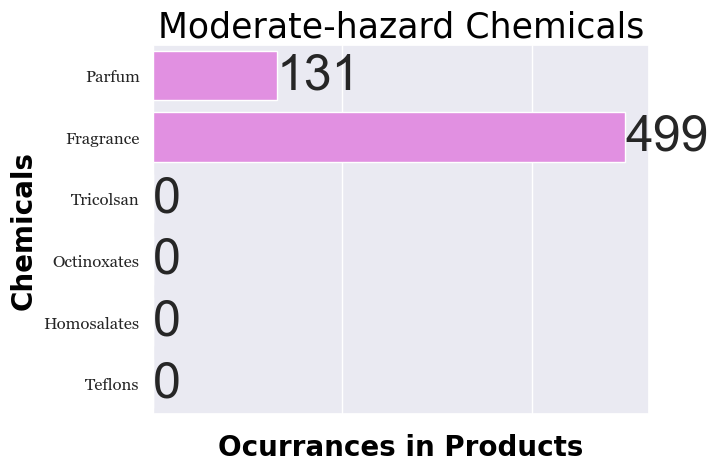

<Figure size 4000x1000 with 0 Axes>

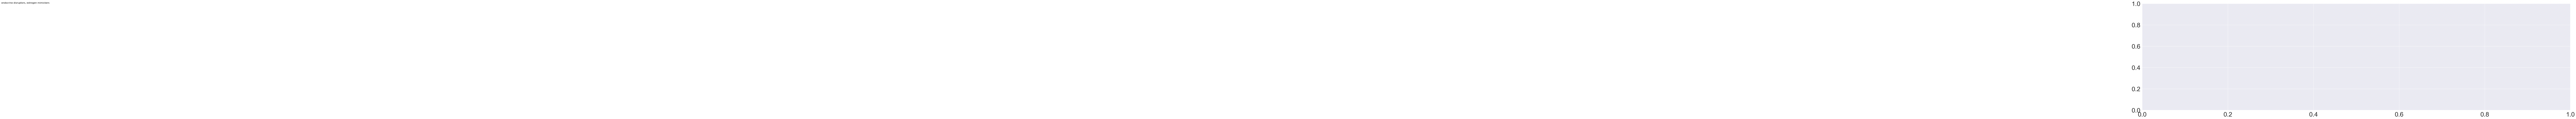

In [ ]:
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
plt.figure(figsize=(40,10))
sns.color_palette("hls", 8)

ax.bar_label(ax.containers[0])

#sns.set_style("whitegrid")
#plt.set(rc={'axes.facecolor': lightblue, 'figures.facecolor': lightblue})

plt.figure(figsize=(40,10))
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
plt.text(-5, 1, 'endocrine disruptors, estrogen mimickers', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Moderate-hazard Chemicals', fontdict=title_font)


## Plotting the high-hazard chemcials

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/198426443.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)


Text(0.5, 1.0, 'High-hazard Chemicals')

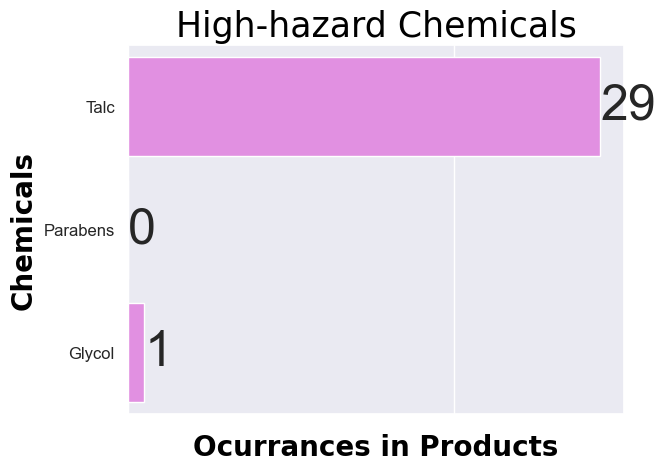

<Figure size 4000x1000 with 0 Axes>

<Figure size 4000x1000 with 0 Axes>

In [ ]:
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances = [talc_occ, parabens_occ, glycol_occ]
chemicals = ['Talc', 'Parabens', 'Glycol']
ax= sns.barplot(x= occurances, y= chemicals, color="violet")


sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
plt.figure(figsize=(40,10))
sns.color_palette("hls", 8)

ax.bar_label(ax.containers[0])

#sns.set_style("whitegrid")
#plt.set(rc={'axes.facecolor': lightblue, 'figures.facecolor': lightblue})

plt.figure(figsize=(40,10))
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('High-hazard Chemicals', fontdict=title_font)




## Plotting the brands with the highest number of toxins in a heatmap

In [ ]:
import pandas as pd

list = ['ethanolamine', 'oxybenzone', 'resorcinol', 'diethanolamine', 'silanes', 'siloxanes', 'octinaxate', 'parfum', 'fragrance', 'homosalate', 'teflon', 'talc', 'paraben', 'bha', 'bht', 'polethylene glycol']

df = pd.read_csv('cosmetics.csv')

test = df[df['Ingredients'].str.contains([list])].shape[0]

print(test)

    i=0
    while i < len(list):
        if test < 1:
            counter = counter + 1
            
        else:
            print(counter)

IndentationError: unexpected indent (2294807057.py, line 11)

In [ ]:


list = ['ethanolamine', 'oxybenzone', 'resorcinol', 'diethanolamine', 'silanes', 'siloxanes', 'octinaxate', 'parfum', 'fragrance', 'homosalate', 'teflon', 'talc', 'paraben', 'bha', 'bht', 'polethylene glycol']


rstr ='|'.join(list)

#test = df[df['Ingredients'].str.contains(rstr).to_string()]

#test1 = df[df['Ingredients'].str.contains('parfum').to_string()]

print(df[df['Ingredients'].str.contains("Parfum")].to_string())




            Label                          Brand                                                                           Name  Price  Rank                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Price vs. Cost - Linear Regression Model

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/397358629.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/397358629.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


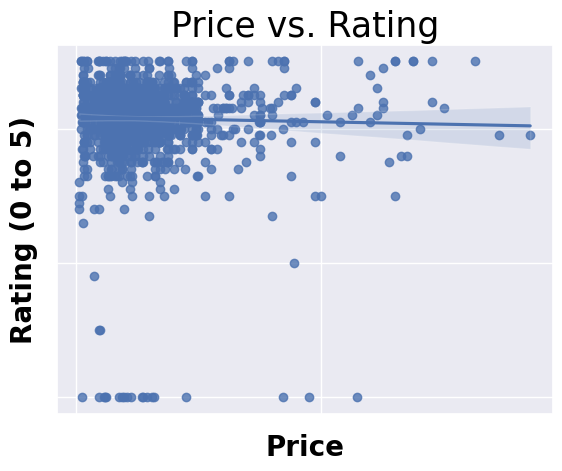

<Figure size 4000x1000 with 0 Axes>

<Figure size 4000x1000 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('cosmetics.csv')
#print(df.iloc[:,3].to_string())


#print(df.iloc[:,4].to_string())

price_list=df['Price'].tolist()
rating_list=df['Rank'].tolist()


#print(price_list)
print("\n")
#print(rating_list)

ax = sns.regplot(
    x=price_list,
    y=rating_list,
    
)

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
plt.figure(figsize=(40,10))
sns.color_palette("hls", 8)

plt.figure(figsize=(40,10))
ax.set_xlabel("Price", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()


## Brand vs. Rank

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/1833284341.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


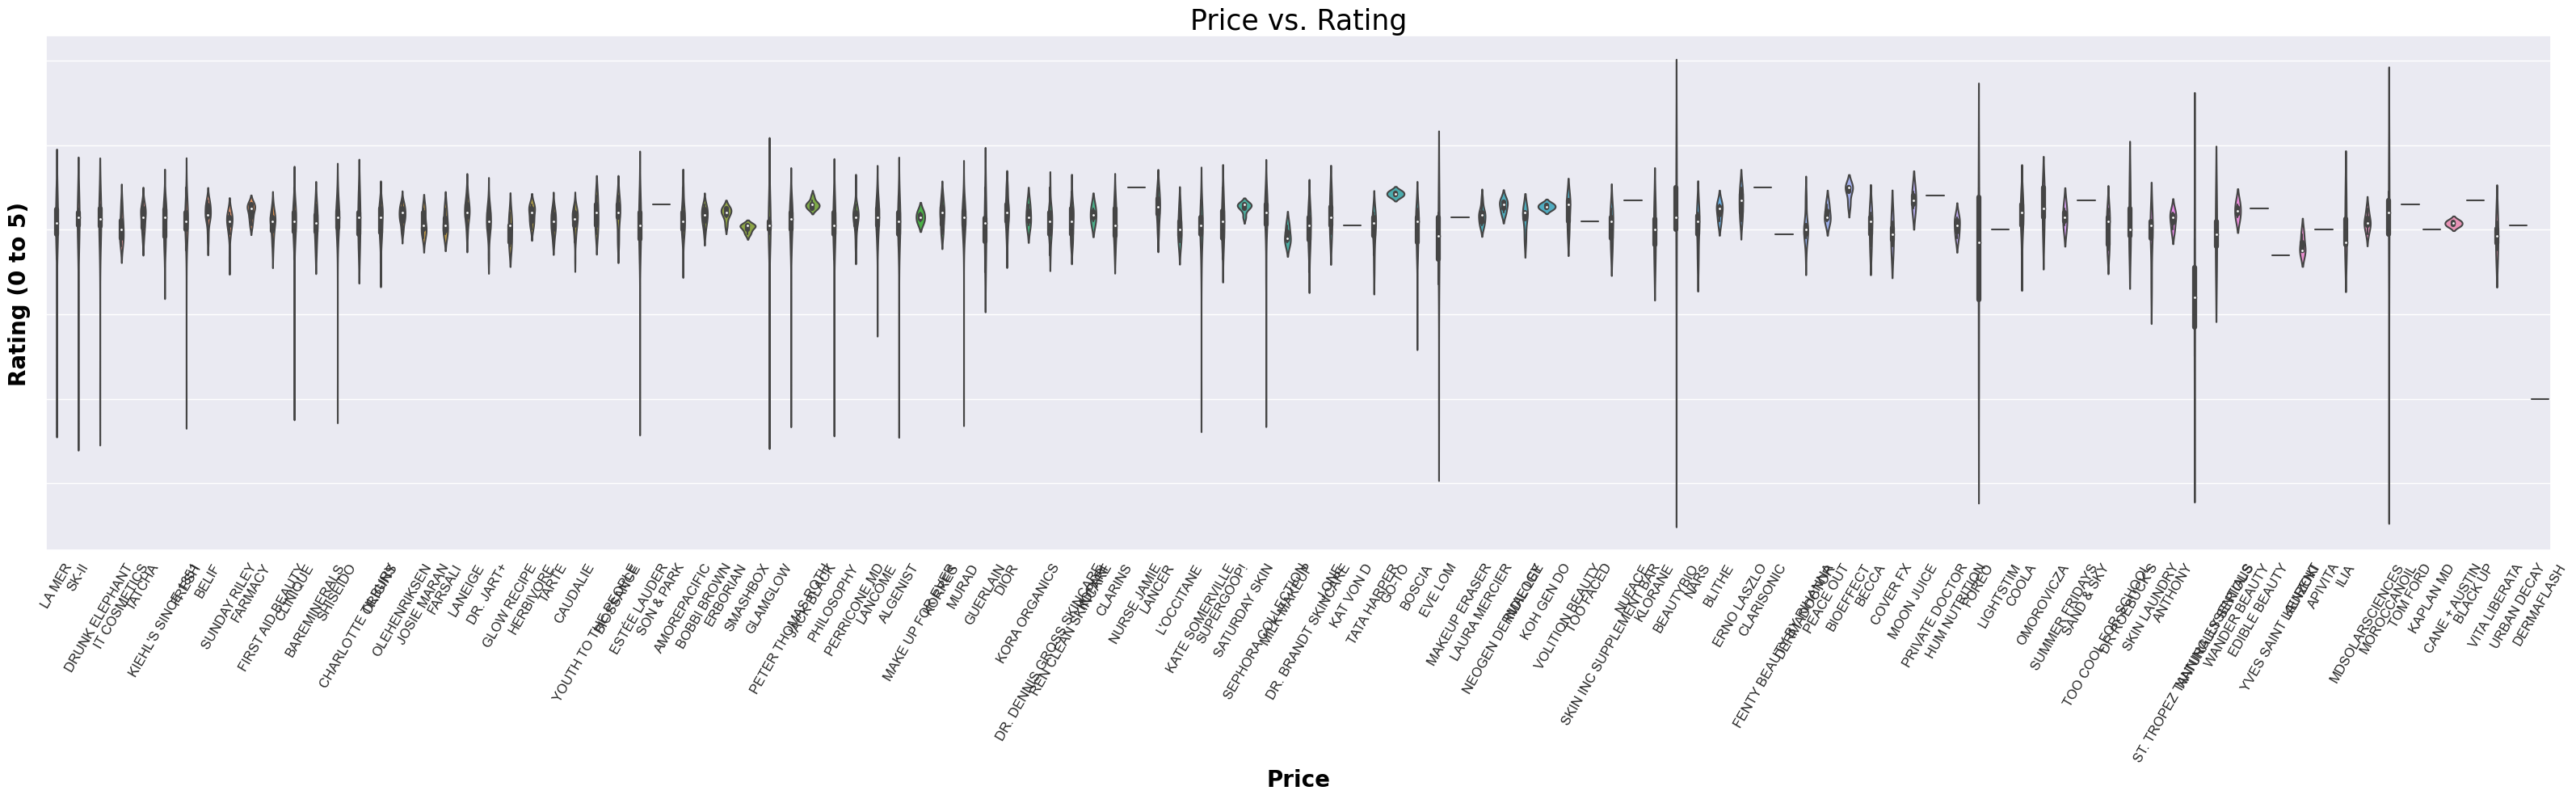

In [ ]:
df = pd.read_csv('cosmetics.csv')
#print(df.iloc[:,3].to_string())


#print(df.iloc[:,4].to_string())

brand_list=df['Brand'].tolist()
rating_list=df['Rank'].tolist()

#print(price_list)
#print("\n")
#print(rating_rank)

ax = sns.violinplot(
    x='Brand',
    y='Rank',
    data = df
)

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

#plt.figure(figsize=(400,10))
sns.set(rc={'figure.figsize':(40,8.27)})
ax.set_xlabel("Price", fontdict = label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation = 60)

ax.set_ylabel("Rating (0 to 5)", fontdict = label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()



/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/2753058050.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/2753058050.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


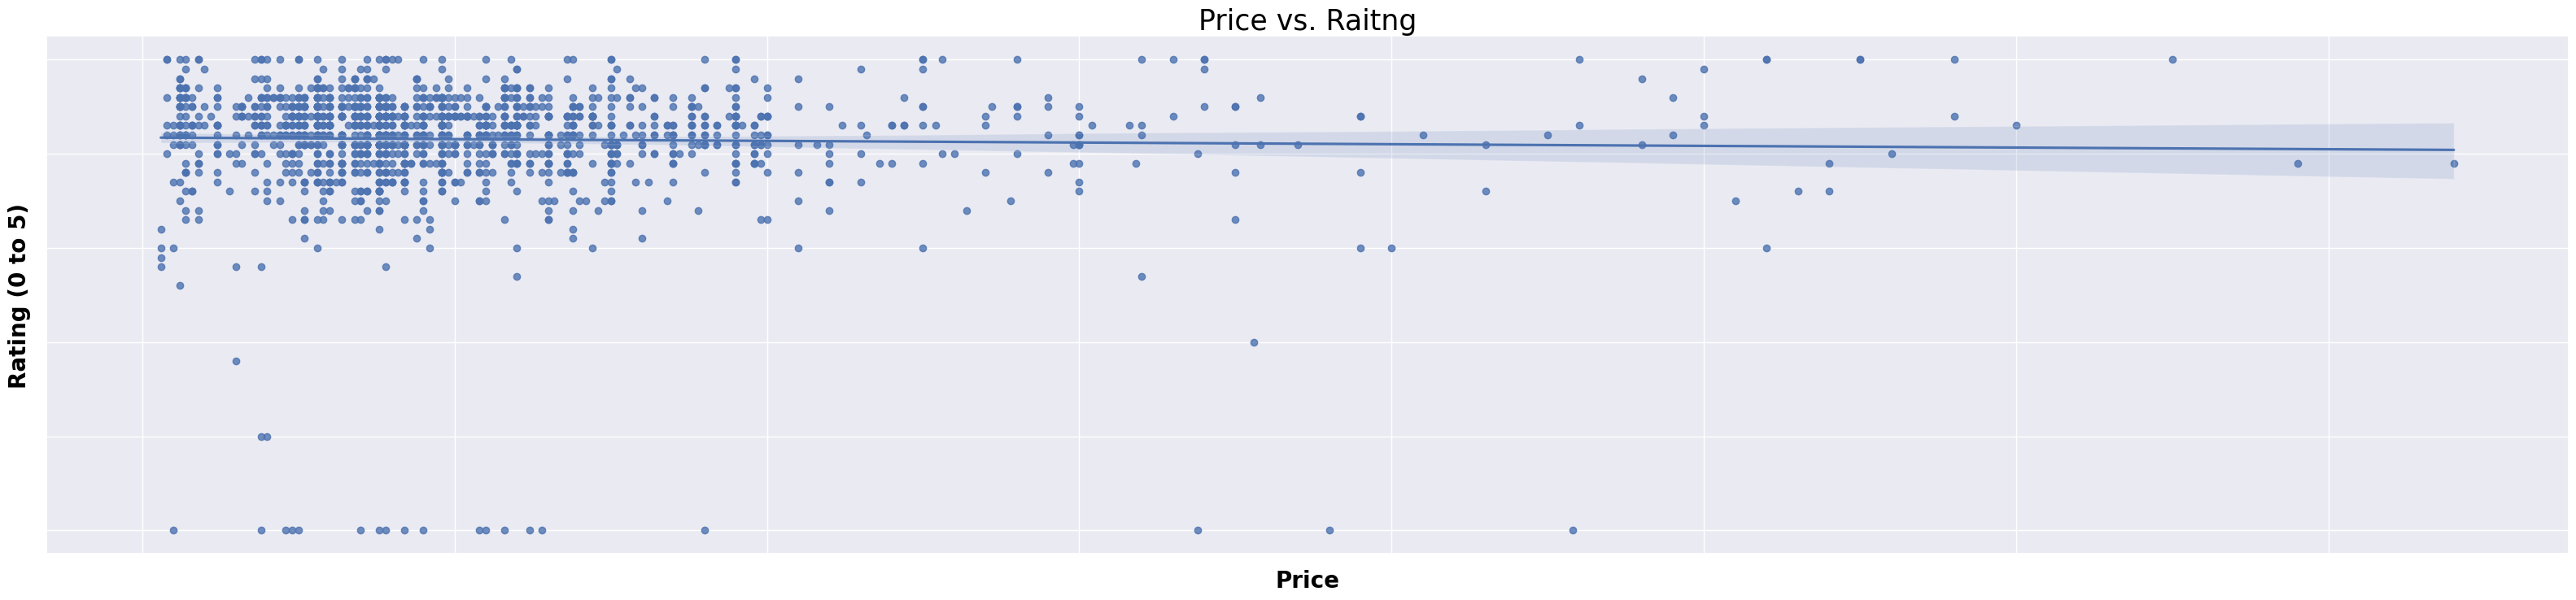

<Figure size 10000x1000 with 0 Axes>

In [ ]:
ax = sns.regplot(
    x="Price", 
    y="Rank", 
    data = df, 
    dropna=False)


x_data = ax.get_lines()[0].get_xdata()
y_data = ax.get_lines()[0].get_ydata()

#p.get_children()[1].get_paths()

#finding the slope at different points in the graph
#print(x_data)
#print(y_data)


sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))
ax.set_xlabel("Price", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)


#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Raitng', fontdict=title_font)


plt.show()

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/638286668.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/638286668.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


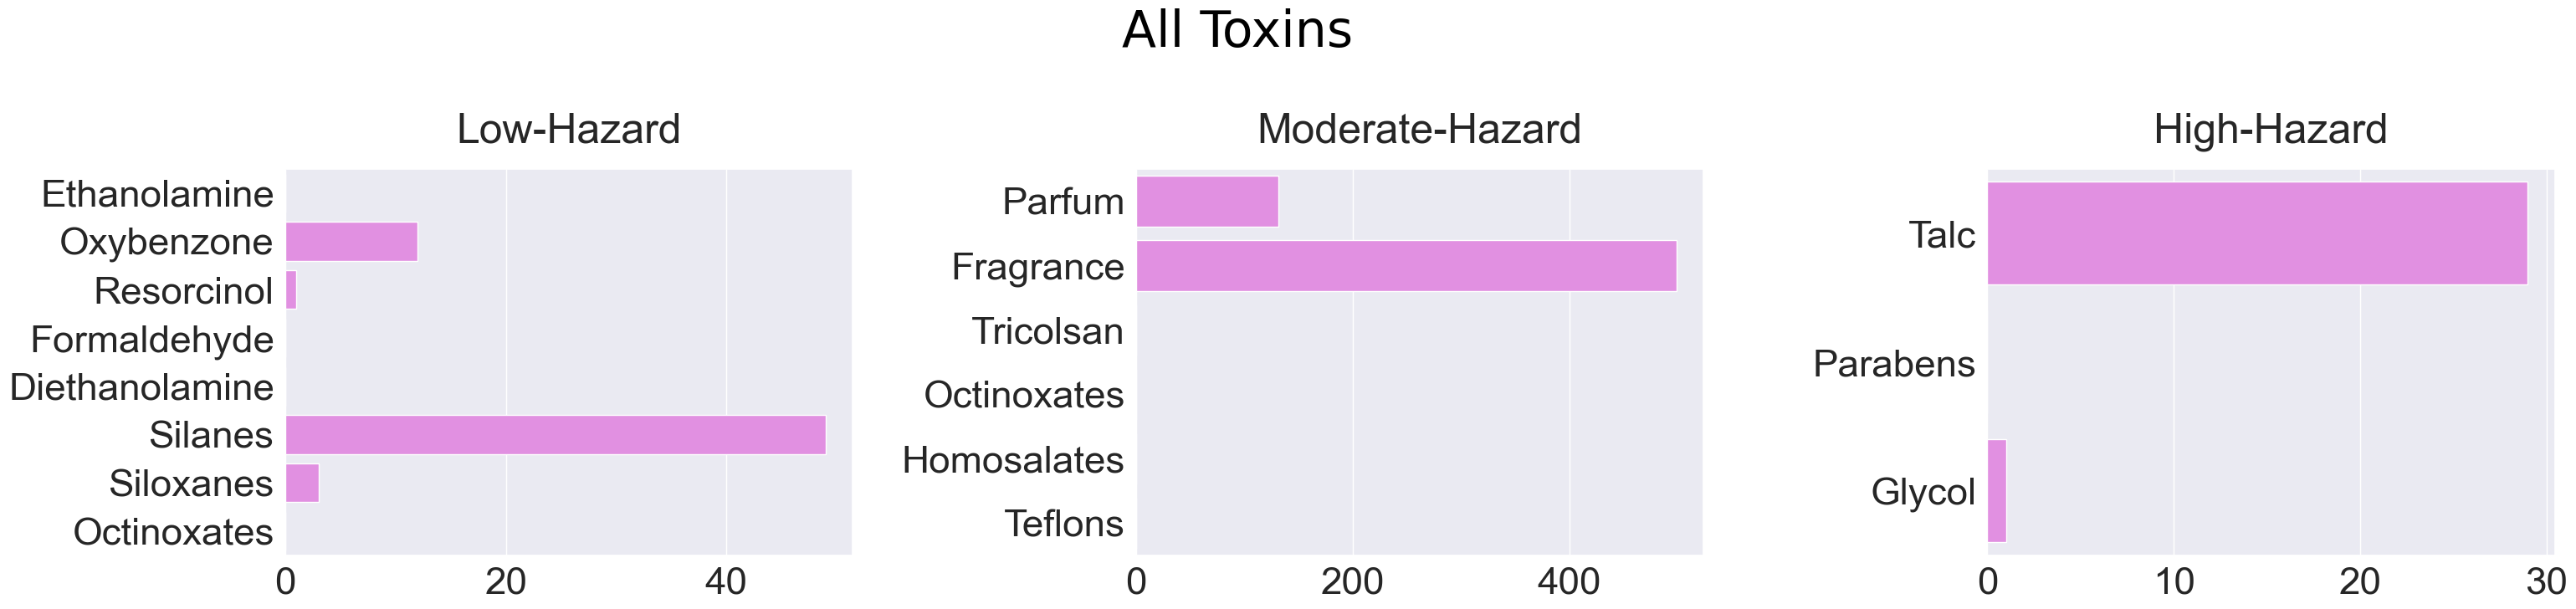

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

In [ ]:
#low hazard
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

occurances = [ethanolamine_occ, oxybenzone_occ, resorcinol_occ, formaldehyde_occ, diethanolamine_occ, silanes_occ, siloxanes_occ, octinaxate_occ]
chemicals = ['Ethanolamine', 'Oxybenzone', 'Resorcinol', 'Formaldehyde', 'Diethanolamine', 'Silanes', 'Siloxanes', 'Octinoxates']

#moderate hazard
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances1 = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals1 = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']

#high hazard
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances2 = [talc_occ, parabens_occ, glycol_occ]
chemicals2 = ['Talc', 'Parabens', 'Glycol']

#total_chem = chemicals + chemicals1 + chemicals2 for swarmplot

fig,axs = plt.subplots(ncols = 3, figsize=(35,6))
sns.barplot(x=occurances, y=chemicals,  color = 'violet', ax=axs[0])
sns.barplot(x=occurances1, y=chemicals1,  color = 'violet', ax=axs[1])
sns.barplot(x=occurances2, y=chemicals2,  color = 'violet', ax=axs[2])

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))

plt.figure(figsize=(100,10))

ax.set_xlabel("Occurances", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Toxin", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)


fig.suptitle('All Toxins', fontdict= title_font, y=1.2, x=.45)

fig.subplots_adjust(hspace=5, wspace=0.5)

axs[0].set_title('Low-Hazard', y=1.05)
axs[1].set_title('Moderate-Hazard', y=1.05)
axs[2].set_title('High-Hazard', y=1.05)

plt.show()
